## 基尼系数

In [1]:
def gini(x):
    """
    二分类问题的基尼系数
    """
    return 1-x**2-(1-x)**2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

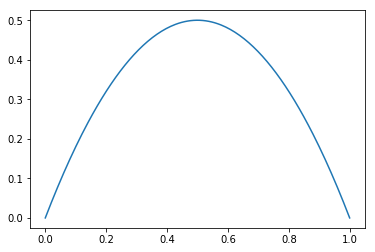

In [3]:
x_plot = np.linspace(0,1,200)
y_plot = gini(x_plot)

plt.plot(x_plot, y_plot)
plt.show()

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X=iris.data
y=iris.target

X=X[:,2:]

In [6]:
X.shape

(150, 2)

In [7]:
y.shape

(150,)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

In [10]:
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    
    X_new=np.c_[x0.ravel(), x1.ravel()]
    
    y_predict=model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap=ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

d:\users\user\anaconda3\envs\keras\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


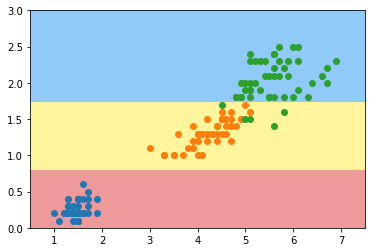

In [12]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## 模拟使用基尼系数划分

In [13]:
def split(X,y,d,value):
    index_lt = (X[:,d]<=value)
    index_gt=(X[:,d]>value)
    return X[index_lt],X[index_gt],y[index_lt],y[index_gt]

In [14]:
from collections import Counter
def calculate_gini(y):
    counter=Counter(y)
    res=1.0
    for num in counter.values():
        p=num/len(y)
        res -= p**2
    return res

In [15]:
def try_split(X,y):
    best_gini=float("inf")
    best_d=-1
    best_value=-1
    
    for d in range(X.shape[1]):
        sorted_index=np.argsort(X[:,d])
        
        for i in range(1, X.shape[1]):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                value = (X[sorted_index[i-1], d] + X[sorted_index[i], d])/2
                
                X_lt,X_gt,y_lt,y_gt = split(X, y,d,value)
                
                g= calculate_gini(y_lt) + calculate_gini(y_gt)
                
                if g<best_gini:
                    best_gini=g
                    best_d=d
                    best_value=value
    return best_gini, best_d, best_value

In [16]:
best_gini,best_d, best_value = try_split(X, y)

In [17]:
best_gini

0.6666366379892796

In [18]:
best_d

0

In [19]:
best_value

1.05

In [20]:
X1_lt,X1_gt,y1_lt,y1_gt= split(X,y,best_d ,best_value)

In [21]:
calculate_gini(y1_lt)

0.0

In [22]:
calculate_gini(y1_gt)

0.6666366379892796

## 接着划分

In [23]:
best_gini2,best_d2,best_value2 = try_split(X1_gt, y1_gt)

In [24]:
best_gini2

0.6665449233016801

In [25]:
best_d2

0

In [26]:
best_value2

1.1499999999999999